# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

d:\devtools\anaconda3\envs\deep-learning\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

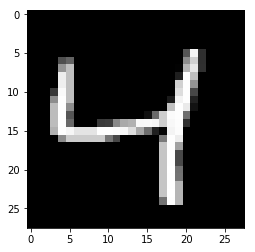

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape = [None, image_size], name='inputs')
targets_ = tf.placeholder(tf.float32, shape = [None, image_size], name='targets')

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation = tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name = 'output')

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6943
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6878
Epoch: 1/20... Training loss: 0.6838
Epoch: 1/20... Training loss: 0.6796
Epoch: 1/20... Training loss: 0.6738
Epoch: 1/20... Training loss: 0.6666
Epoch: 1/20... Training loss: 0.6588
Epoch: 1/20... Training loss: 0.6487
Epoch: 1/20... Training loss: 0.6377
Epoch: 1/20... Training loss: 0.6245
Epoch: 1/20... Training loss: 0.6125
Epoch: 1/20... Training loss: 0.5960
Epoch: 1/20... Training loss: 0.5826
Epoch: 1/20... Training loss: 0.5621
Epoch: 1/20... Training loss: 0.5481
Epoch: 1/20... Training loss: 0.5286
Epoch: 1/20... Training loss: 0.5112
Epoch: 1/20... Training loss: 0.4935
Epoch: 1/20... Training loss: 0.4766
Epoch: 1/20... Training loss: 0.4566
Epoch: 1/20... Training loss: 0.4407
Epoch: 1/20... Training loss: 0.4196
Epoch: 1/20... Training loss: 0.4124
Epoch: 1/20... Training loss: 0.4005
Epoch: 1/20... Training loss: 0.3768
Epoch: 1/20... Training loss: 0.3738
E

Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1932
Epoch: 1/20... Training loss: 0.1964
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1879
Epoch: 1/20... Training loss: 0.1941
Epoch: 1/20... Training loss: 0.1835
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1860
Epoch: 1/20... Training loss: 0.1925
Epoch: 1/20... Training loss: 0.1866
Epoch: 1/20... Training loss: 0.1911
Epoch: 1/20... Training loss: 0.1824
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1883
Epoch: 1/20... Training loss: 0.1798
Epoch: 1/20... Training loss: 0.1876
Epoch: 1/20... Training loss: 0.1769
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1841
Epoch: 1/20... Training loss: 0.1924
Epoch: 1/20... Training loss: 0.1855
Epoch: 1/20... Training loss: 0.1888
Epoch: 1/20... Training loss: 0.1864
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1873
Epoch: 1/20... Training loss: 0.1805
E

Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1590
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1539
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1603
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1569
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1574
Epoch: 2/20... Training loss: 0.1564
Epoch: 2/20... Training loss: 0.1566
Epoch: 2/20... Training loss: 0.1540
Epoch: 2/20... Training loss: 0.1542
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1579
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1586
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1599
Epoch: 2/20... Training loss: 0.1512
Epoch: 2/20... Training loss: 0.1526
Epoch: 2/20... Training loss: 0.1520
Epoch: 2/20... Training loss: 0.1489
Epoch: 2/20... Training loss: 0.1488
E

Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1376
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1323
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1308
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1294
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1326
Epoch: 3/20... Training loss: 0.1336
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1307
Epoch: 3/20... Training loss: 0.1318
Epoch: 3/20... Training loss: 0.1292
Epoch: 3/20... Training loss: 0.1315
Epoch: 3/20... Training loss: 0.1312
Epoch: 3/20... Training loss: 0.1298
E

Epoch: 4/20... Training loss: 0.1202
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1183
Epoch: 4/20... Training loss: 0.1195
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1206
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1151
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1222
Epoch: 4/20... Training loss: 0.1139
E

Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1169
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1129
Epoch: 5/20... Training loss: 0.1136
Epoch: 5/20... Training loss: 0.1111
Epoch: 5/20... Training loss: 0.1177
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1134
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1118
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1124
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1163
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1139
Epoch: 5/20... Training loss: 0.1120
E

Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1076
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1084
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1122
Epoch: 6/20... Training loss: 0.1093
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1094
Epoch: 6/20... Training loss: 0.1110
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1109
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1089
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1097
Epoch: 6/20... Training loss: 0.1063
E

Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1021
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1031
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1000
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.1056
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1009
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1013
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.0972
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1049
Epoch: 6/20... Training loss: 0.1017
Epoch: 6/20... Training loss: 0.0995
Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1003
E

Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0992
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1004
E

Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0980
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1021
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1031
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0946
Epoch: 8/20... Training loss: 0.0992
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.1004
E

Epoch: 9/20... Training loss: 0.0941
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0993
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0988
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0965
E

Epoch: 10/20... Training loss: 0.0985
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0907
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0968
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0986
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0992
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0903
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0976
Epoch: 11/20... Training loss: 0.0969
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0983
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0947
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0978
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0958
Epoch: 11/20... Training loss: 0.0992
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0930
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0937
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0956
Epoch: 11/20... Training loss: 0.0944
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0984
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0956
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0972
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0900
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0978
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0973
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0958
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0922
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0914
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0975
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20

Epoch: 14/20... Training loss: 0.0965
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0995
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0884
Epoch: 14/20... Training loss: 0.1015
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0956
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0969
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0945
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0903
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0964
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0957
Epoch: 16/20... Training loss: 0.0908
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0964
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0914
Epoch: 17/20... Training loss: 0.0966
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0974
Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0907
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0962
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0915
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0900
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0940
Epoch: 19/20... Training loss: 0.0912
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0933
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0865
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0957
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0886
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

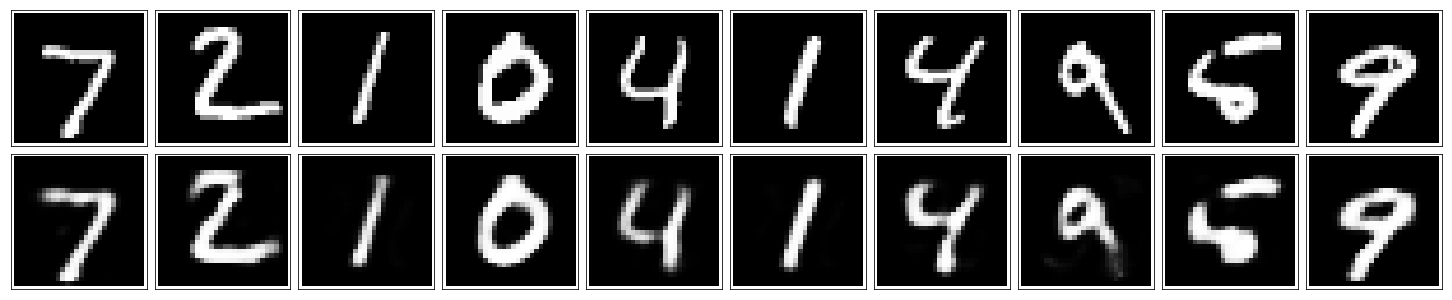

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.